In [3]:
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
%matplotlib inline

In [4]:
X, Y = load_planar_dataset()

In [5]:
X.shape,Y.shape

((2, 400), (1, 400))

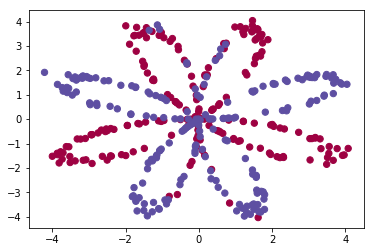

In [6]:
plt.scatter(X[0,:], X[1,:], c=Y[0, :], s=40, cmap=plt.cm.Spectral);

In [7]:
shape_X = X.shape
shape_Y = Y.shape
m = Y.size
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [8]:
clf = sklearn.linear_model.LogisticRegressionCV(cv=5);
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


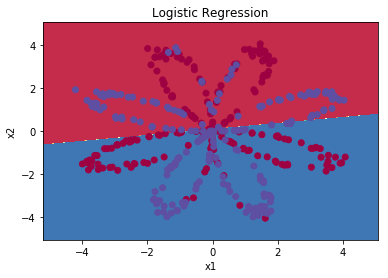

In [9]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [10]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x,n_h,n_y)

In [11]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x,n_h,n_y) = layer_sizes(X_assess,Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [14]:
def initialize_parameters(n_x,n_h,n_y):
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y, 1))
    assert(W1.shape == (n_h,n_x))
    assert(b1.shape == (n_h,1))
    assert(W2.shape == (n_y,n_h))
    assert(b2.shape == (n_y,1))
    parameters = {"W1": W1,
                "b1": b1,
                 "W2": W2,
                 "b2": b2}
    return parameters

In [15]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00845206 -0.00671246]
 [-0.00012665 -0.0111731 ]
 [ 0.00234416  0.01659802]
 [ 0.00742044 -0.00191836]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00887629 -0.00747158  0.01692455  0.00050808]]
b2 = [[0.]]


In [16]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    z1 = np.dot(W1,X)+b1
    A1 = np.tanh(z1)
    z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(z2)
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1":z1,
            "A1":A1,
            "Z2":z2,
            "A2":A2}
    return A2, cache

In [17]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [20]:
def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    logprobs = np.multiply(np.log(A2), Y)+np.multiply((1-Y),np.log(1-A2))
    cost = -1/m*np.sum(logprobs)
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

In [21]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761265


In [26]:
def backward_propagation(parameters,cache,X,Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2 - Y
    dW2 = (1/m)*np.dot(dZ2, A1.T)
    db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), (1-np.power(A1,2)))
    dW1 = (1/m)*np.dot(dZ1, X.T)
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1,
            "db1": db1,
            "dW2": dW2,
            "db2": db2}
    return grads

In [27]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [28]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    parameters = {"W1": W1,
                 "b1": b1,
                 "W2": W2,
                 "b2": b2}
    return parameters

In [29]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [30]:
def nn_model(X,Y,n_h,num_iterations=1000,print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2,Y,parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i%1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [31]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

C:\Users\Aryan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


W1 = [[-7.52965012  1.24315723]
 [-4.20942877  5.31619433]
 [-4.19461118  5.32514179]
 [-7.5298373   1.24306843]]
b1 = [[3.79487807]
 [2.32873193]
 [2.33002005]
 [3.7946091 ]]
W2 = [[-6007.41793474 -6033.7181491  -6032.67002793 -6007.80100186]]
b2 = [[-53.09356574]]


In [32]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

In [33]:
parameters, X_assess = predict_test_case()
predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693145
Cost after iteration 1000: 0.287916
Cost after iteration 2000: 0.252237
Cost after iteration 3000: 0.233550
Cost after iteration 4000: 0.226677
Cost after iteration 5000: 0.222579
Cost after iteration 6000: 0.219684
Cost after iteration 7000: 0.217465
Cost after iteration 8000: 0.219453
Cost after iteration 9000: 0.218603


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

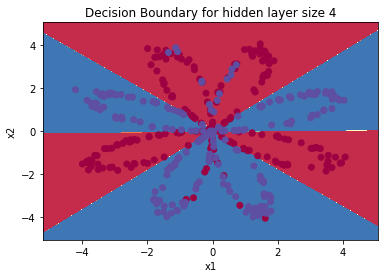

In [34]:
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [35]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 90.75 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.75 %


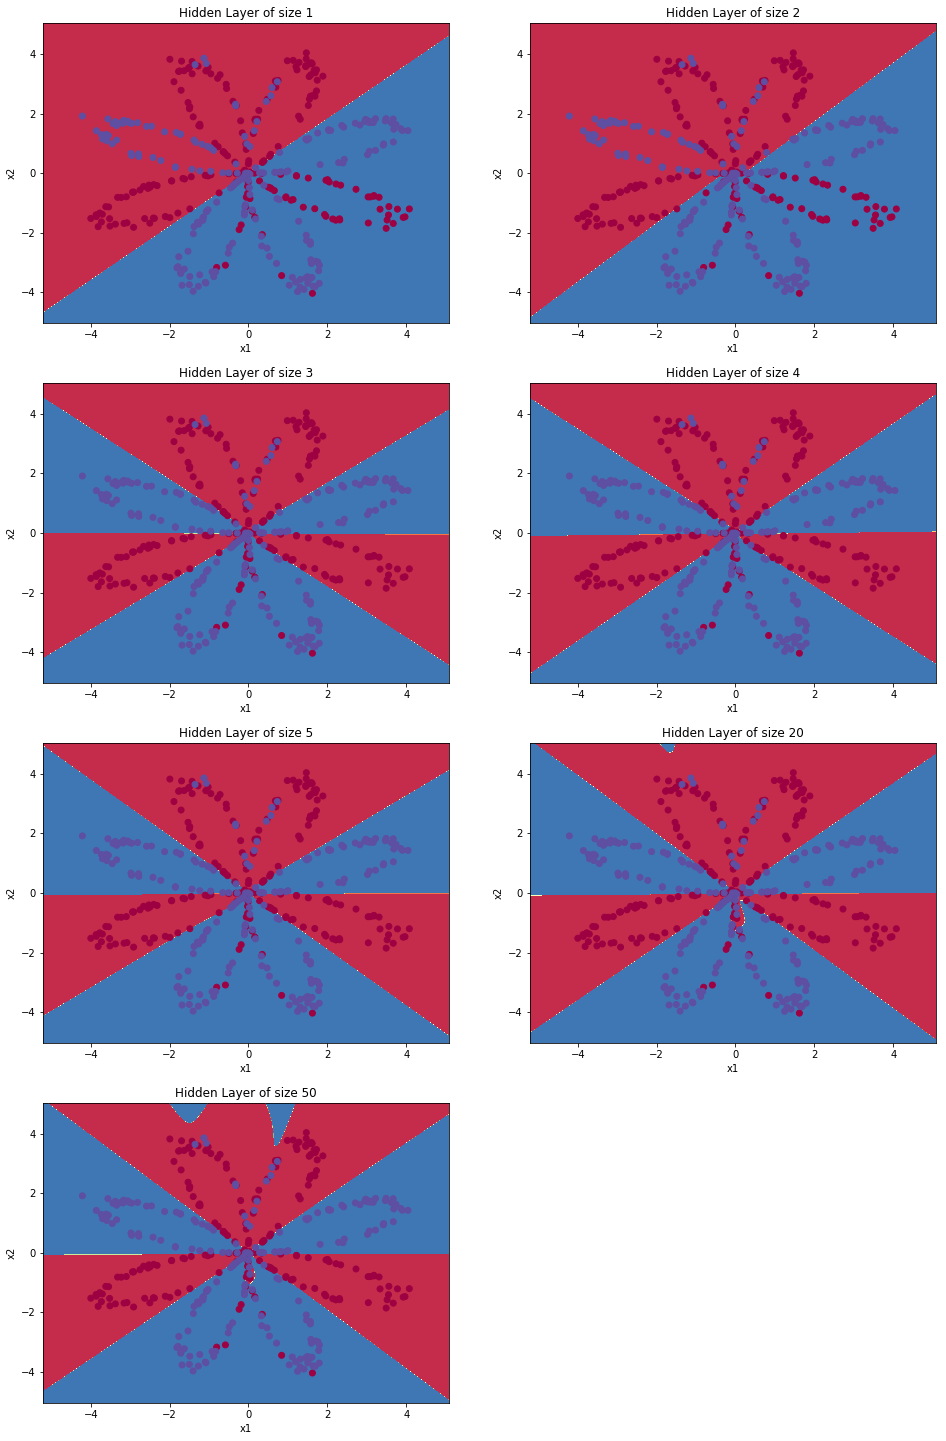

In [37]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' %n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T)+np.dot(1-Y, 1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))